# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys


for p in ['..', '../..', '../../..', '../../../..']:
    d = os.path.abspath(p)
    if d not in sys.path:
        sys.path.insert(0,d)
    
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
d = [os.path.abspath('../../../../../custom_envs/gym-tiger'),
    os.path.abspath('../../../../../custom_envs/gym-dummy/')]
for _d in d:
    if _d not in sys.path:
        sys.path.insert(0, _d)
    

"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name


def reload():
    """Helper function for hot-reloading QLearnerObsSingle class from source"""
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_single.qlearner_obs_single',
        'QLearnerObsSingle')
    global QLearnerObsSingle
    from experiments.qlearning.basic.qlearner_obs_single.qlearner_obs_single \
        import QLearnerObsSingle
    
import gym
import gym_tiger
import gym_dummy
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_single.qlearner_obs_single \
    import QLearnerObsSingle

# Setup ENV and Model

In [11]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_single.qlearner_obs_single \
    import QLearnerObsSingle


env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500)
model = QLearnerObsSingle(env, initial_alpha=.5, gamma=.9, alpha_decay=.4)
eps = 1
n = 0
ot = env.reset()

/Users/jblandin/miniconda3/envs/research/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


# Take one action and update Q

$$
Q(s_{t-1}, a_{t-1}) = Q(s_{t-1}, a_{t-1}) + \alpha \big[ r_t + \gamma \cdot Q(s_t, a_t) - Q(s_{t-1}, a_{t-1}) \big]
$$

In [12]:
print(model)
otm1 = ot
atm1 = model.sample_action(otm1, eps)
ot, r, done, info = env.step(atm1)
at = model.best_action(ot)
model.update(otm1, atm1, r, ot, at)
_otm1 = env.translate_obs(otm1)
_atm1 = env.translate_action(atm1)
print(_otm1, ',', _atm1, ',', r)
print(model)



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT            0.0 |        0.0 |    0.0
GROWL RIGHT:          0.0 |        0.0 |    0.0
START:                0.0 |        0.0 |    0.0

START , OPEN_LEFT , 10


           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT            0.0 |        0.0 |    0.0
GROWL RIGHT:          0.0 |        0.0 |    0.0
START:                5.0 |        0.0 |    0.0



# Play 1 Episode (500 steps)

In [13]:
play_one(env, model, eps, verbose=True)

o_t-n,...,o_t-1                                 | o_t-1       | a_t-1      | r     | o_t         | a_t       
----------------------------------------------------------------------------------------------------
                                                | START       | OPEN_RIGHT | 10    | GROWL_LEFT  | OPEN_LEFT 
                                                | GROWL_LEFT  | OPEN_LEFT  | -100  | GROWL_LEFT  | OPEN_LEFT 
                                                | GROWL_LEFT  | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_LEFT 
                                                | GROWL_RIGHT | OPEN_RIGHT | 10    | GROWL_LEFT  | LISTEN    
                                                | GROWL_LEFT  | LISTEN     | -1    | GROWL_LEFT  | LISTEN    
                                                | GROWL_LEFT  | OPEN_LEFT  | -100  | GROWL_LEFT  | LISTEN    
                                                | GROWL_LEFT  | LISTEN     | -1    | GROWL_RIGHT | OPEN_RIGHT
                   

-16000

In [14]:
print(model)



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -45.21 |     -56.03 |  -3.58
GROWL RIGHT:       -54.25 |     -48.21 |  -3.57
START:                5.0 |       3.79 |    0.0



# Play 100 Episodes



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -32.45 |      -47.9 |  -4.33
GROWL RIGHT:       -60.05 |     -44.87 |  -4.24
START:                0.0 |        0.0 |   -0.5



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -54.28 |     -54.24 |  -9.99
GROWL RIGHT:       -60.02 |     -51.41 |  -9.99
START:               -4.9 |      -7.51 |  -2.48



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -59.71 |     -53.21 |  -10.0
GROWL RIGHT:       -55.64 |     -51.28 |  -10.0
START:               -4.9 |      -7.51 |  -3.94



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -54.02 |     -61.79 |  -10.0
GROWL RIGHT:       -53.93 |     -58.12 |  -10.0
START:              -5.75 |      -7.51 |  -4.87



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -

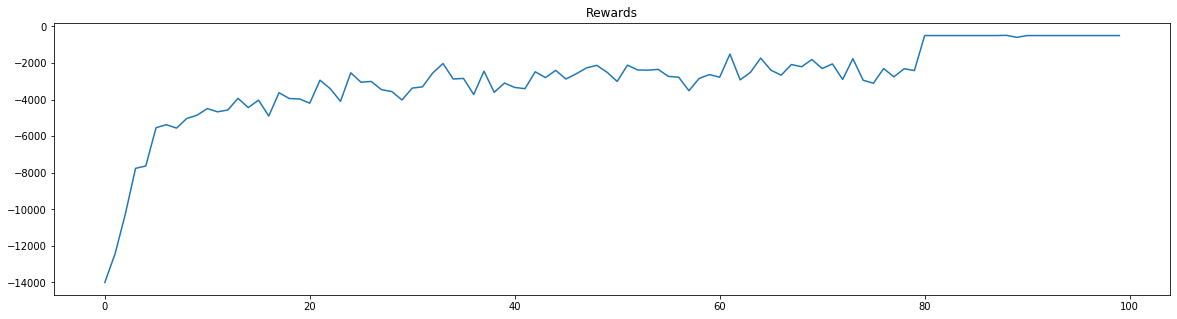

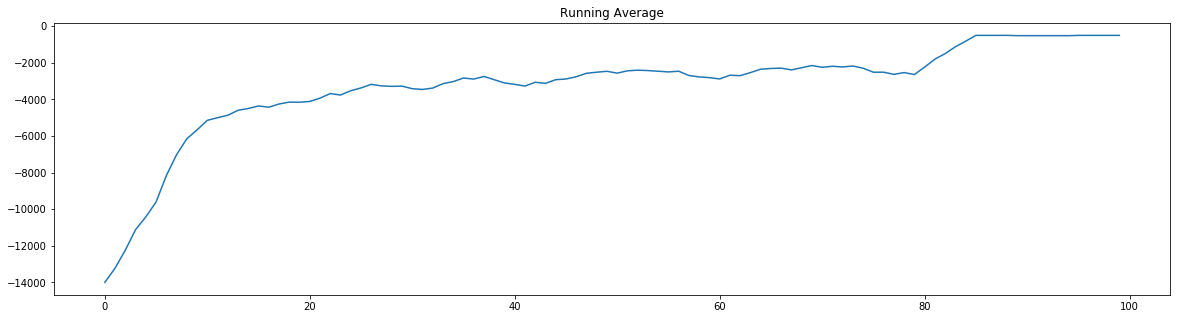

In [16]:
env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500)
model = QLearnerObsSingle(env, initial_alpha=.5, gamma=.9, alpha_decay=.4)
eps = 1
n = 0
ot = env.reset()

N = 100
totalrewards = np.empty(N)
for n in range(N):
    if n >= N - (N/5):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        print(model)

print("avg reward for last {} episodes:".format(N/5),
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)

# DummyEnv

/Users/jblandin/miniconda3/envs/research/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)




       	ACTION 0 | ACTION 1
	-------- | --------
OBS 0        0.0 |      0.0
OBS 1        0.0 |      0.0



       	ACTION 0 | ACTION 1
	-------- | --------
OBS 0       0.82 |    -0.11
OBS 1      -0.19 |     1.83



       	ACTION 0 | ACTION 1
	-------- | --------
OBS 0       1.95 |      1.0
OBS 1       0.94 |     2.92



       	ACTION 0 | ACTION 1
	-------- | --------
OBS 0       2.04 |     0.98
OBS 1       0.99 |     3.03



       	ACTION 0 | ACTION 1
	-------- | --------
OBS 0       2.05 |     1.03
OBS 1       0.99 |     3.01



       	ACTION 0 | ACTION 1
	-------- | --------
OBS 0       2.01 |     1.03
OBS 1       0.99 |     3.02

avg reward for last 100.0 episodes: 49.48


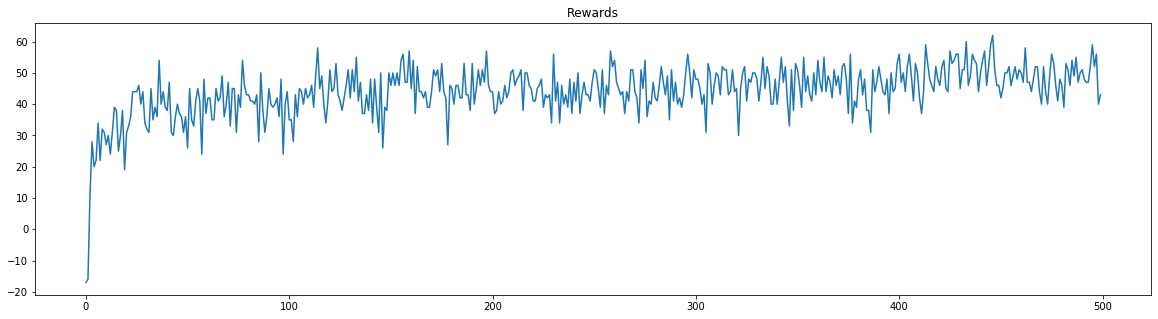

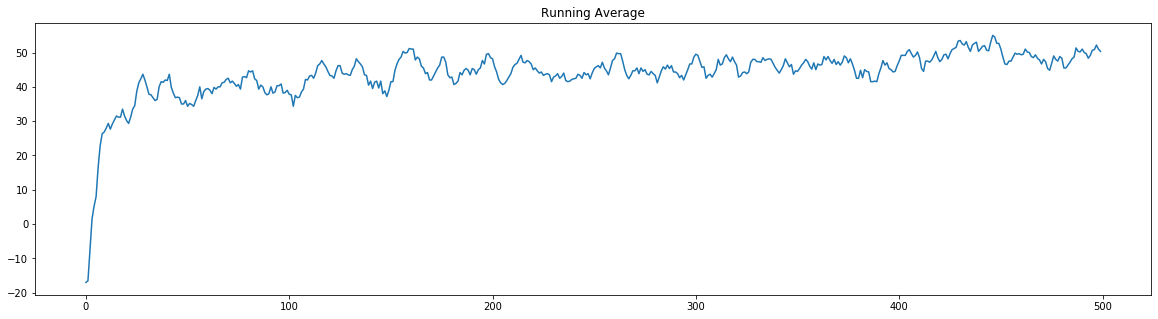

In [5]:
class DummyFeatureTransformer:
    
    def __init__(self):
        pass
    
    def transform(self, o):
        if o[0] < 0:
            return 0
        else:
            return 1

env = gym.make('Dummy-v0')
env.__init__()
model = QLearnerObsSingle(env, initial_alpha=.5, gamma=.8,
                          feature_transformer=DummyFeatureTransformer(),
                          alpha_decay=.4)
eps = 1
n = 0
ot = env.reset()

N = 500
totalrewards = np.empty(N)

print(model)

for n in range(N):
    if n >= N - (N/5):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        print(model)

print("avg reward for last {} episodes:".format(N/5),
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)